# SnMultiome ATAC data

Export metadata for ATAC component of snMultiome.

In [2]:
library(Matrix)
library(ggplot2)

### Metadata

In [25]:
metadata = read.table("../20220609_Multiome_SnapATAC/sessions/20220612_n13525/metadata.w.transfer.cluster.tsv", 
                      header=T,
                      stringsAsFactors=F)

metadata$cluster = NULL # remove clusters called only on D1M, D2M and D2

metadata$old_transfered_cluster = metadata$transfered_cluster
metadata$transfered_cluster = NULL

head(metadata)

,barcode,TN,UM,PP,UQ,CM,umap1,umap2,sample,cells,old_transfered_cluster
,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,AAAAAAAAAAACATGCTATTAGCC,6736,6736,6736,6729,373,-0.4031222,-3.454888,D1M,D1M_AAAAAAAAAAACATGCTATTAGCC,3
2,AAAAAAAAAAACATGCTCACCCTC,28369,28369,28369,28339,2447,2.6643078,-3.955240,D1M,D1M_AAAAAAAAAAACATGCTCACCCTC,3
3,AAAAAAAAAAACATGCTTGAGAAC,28635,28635,28635,28609,2201,-0.2071755,2.688192,D1M,D1M_AAAAAAAAAAACATGCTTGAGAAC,15
4,AAAAAAAAAAACCATGAACCTTGT,33869,33869,33869,33838,3018,3.1269215,-4.609105,D1M,D1M_AAAAAAAAAAACCATGAACCTTGT,3
5,AAAAAAAAAAACCATGAGCTTAAA,18885,18885,18885,18867,1514,-0.1988264,1.998739,D1M,D1M_AAAAAAAAAAACCATGAGCTTAAA,15
6,AAAAAAAAAAACCATGATATAGGC,12385,12385,12385,12370,1282,1.7942727,-3.712197,D1M,D1M_AAAAAAAAAAACCATGATATAGGC,3


In [26]:
cluster_config = read.table("../../figures_factory/configs/cluster.tsv",comment.char = '', sep='\t', header=T, stringsAsFactors=F)
cluster_config

cluster,colour,description,new_cluster
<int>,<chr>,<chr>,<int>
1,#B03743,Fibroblast,1
2,#E85F6D,Fibroblast-like,3
3,#7C2730,Fibroblast-like,2
4,#F0A118,Intermediate,12
5,#78A824,Pre-iPSC,13
6,#A6D854,Pre-iPSC,14
7,#F01D35,Fibroblast-like,5
8,#13C4A3,iPSC,15
9,#406614,Partially-reprogrammed,10


In [27]:
metadata$cluster = cluster_config[metadata$old_transfered_cluster, "new_cluster"]

metadata$old_transfered_cluster = NULL

head(metadata)

,barcode,TN,UM,PP,UQ,CM,umap1,umap2,sample,cells,cluster
,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,AAAAAAAAAAACATGCTATTAGCC,6736,6736,6736,6729,373,-0.4031222,-3.454888,D1M,D1M_AAAAAAAAAAACATGCTATTAGCC,2
2,AAAAAAAAAAACATGCTCACCCTC,28369,28369,28369,28339,2447,2.6643078,-3.955240,D1M,D1M_AAAAAAAAAAACATGCTCACCCTC,2
3,AAAAAAAAAAACATGCTTGAGAAC,28635,28635,28635,28609,2201,-0.2071755,2.688192,D1M,D1M_AAAAAAAAAAACATGCTTGAGAAC,7
4,AAAAAAAAAAACCATGAACCTTGT,33869,33869,33869,33838,3018,3.1269215,-4.609105,D1M,D1M_AAAAAAAAAAACCATGAACCTTGT,2
5,AAAAAAAAAAACCATGAGCTTAAA,18885,18885,18885,18867,1514,-0.1988264,1.998739,D1M,D1M_AAAAAAAAAAACCATGAGCTTAAA,7
6,AAAAAAAAAAACCATGATATAGGC,12385,12385,12385,12370,1282,1.7942727,-3.712197,D1M,D1M_AAAAAAAAAAACCATGATATAGGC,2


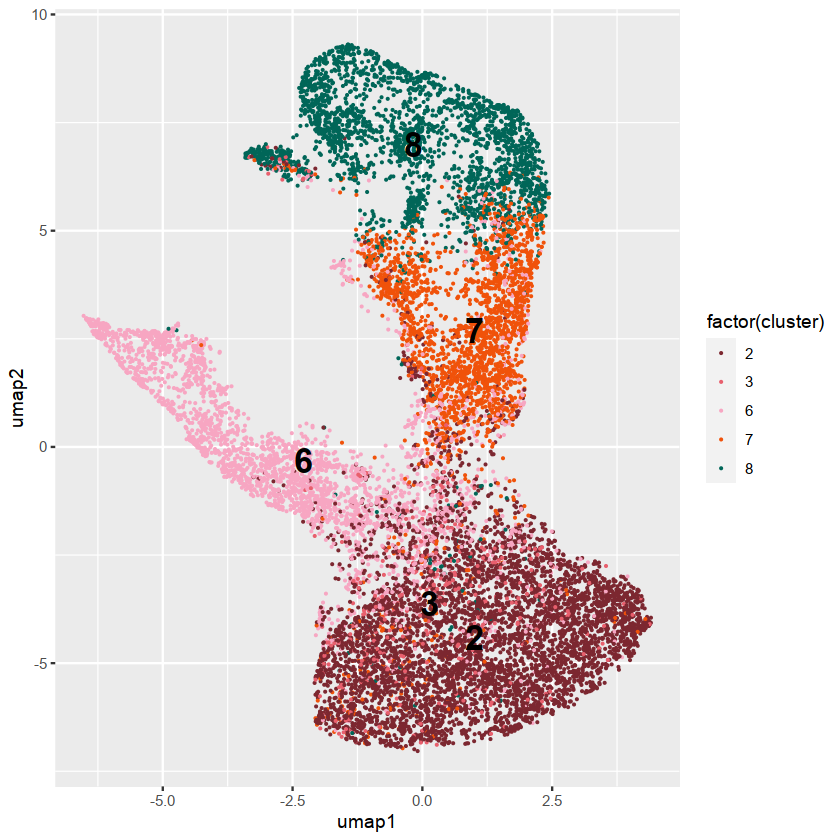

In [29]:
cc = cluster_config[cluster_config$new_cluster %in% unique(metadata$cluster), ]

ggplot(metadata) +
geom_point(aes(x=umap1,y=umap2,color=factor(cluster)), size=0.1) +
scale_color_manual(values=as.character(cc$colour[order(cc$new_cluster)])) +
geom_text(data=data.frame(aggregate(metadata[,c("umap1","umap2")], 
                                    list(metadata$cluster), median)),
         aes(x=umap1, y=umap2, label=Group.1), fontface = "bold", size=7)

In [30]:
metadata$TN = NULL
metadata$UM = NULL
metadata$PP = NULL
metadata$UQ = NULL
metadata$CM = NULL
metadata$cells = NULL 

head(metadata)

,barcode,umap1,umap2,sample,cluster
,<chr>,<dbl>,<dbl>,<chr>,<int>
1,AAAAAAAAAAACATGCTATTAGCC,-0.4031222,-3.454888,D1M,2
2,AAAAAAAAAAACATGCTCACCCTC,2.6643078,-3.955240,D1M,2
3,AAAAAAAAAAACATGCTTGAGAAC,-0.2071755,2.688192,D1M,7
4,AAAAAAAAAAACCATGAACCTTGT,3.1269215,-4.609105,D1M,2
5,AAAAAAAAAAACCATGAGCTTAAA,-0.1988264,1.998739,D1M,7
6,AAAAAAAAAAACCATGATATAGGC,1.7942727,-3.712197,D1M,2


In [31]:
dim(metadata)

[1] 13525     5

In [24]:
write.table(metadata, file="/oak/stanford/groups/akundaje/surag/projects/reprog-package/analysis/snMultiome/ATAC/cells.tsv",
           sep='\t', row.names=F, quote=F)